# Kaggle case: 
https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification/code

Aquest dataset classifica la salut fetal per prevenir la mortalitat infantil i materna.

## Atributs:
Aquesta base té 22 atributs dels quals 21 són numèrics i 1 és categòric (fetal_health; el target).

Els atributs són els següents:

-baseline value: Freqüència cardíaca fetal de referència (FHR) (batecs per minut)

-accelerations: Nombre d'acceleracions per segon

-fetal_movement: Nombre de moviments fetals per segon

-uterine_contractions: Nombre de contraccions uterines per segon

-light_decelerations: Nombre de LDs per segon (lleugeres desacceleracions)

-severe_decelerations: Nombre de SDs per segon (desacceleracions severes)

-prolongued_decelerations: Nombre de PDs per segon (desacceleracions prolongades)

-abnormal_short_term_variability: Percentatge de temps amb variabilitat anormal a curt termini

-mean_value_of_short_term_variability: Valor mitjà de la variabilitat a curt termini

-percentage_of_time_with_abnormal_long_term_variability: Percentatge de temps amb variabilitat anormal a llarg termini

-mean_value_of_long_term_variability: Valor mitjà de la variabilitat a llarg termini

-histogram_width: Amplada de l'histograma fet utilitzant tots els valors d'un registre

-histogram_min: Valor mínim de l'histograma

-histogram_max: Valor màxim de l'histograma

-histogram_number_of_peaks: Nombre de pics a l'histograma

-histogram_number_of_zeroes: Nombre de zeros a l'histograma

-histogram_mode: Mode de l'histograma

-histogram_mean: Mitjana de l'histograma

-histogram_median: Mediana de l'histograma

-histogram_variance: Variància de l'histograma

-histogram_tendency: Tendència de l'histograma

## Atribut objectiu:

-fetal_health: Normal=1 - Suspect=2 - Pathological=3

## Recursos externs utilitzats:

In [33]:
# time
import time

# Per a calculs i gestio de arrays:
import math
import numpy as np

# Gestio de la base de dades:
import pandas as pd

# Preprocessing:
from sklearn.decomposition import PCA

#Visualitzacio:
import seaborn as sns;
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

#Resample
from sklearn.utils import resample

#Estructura entrenament, test...  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Models Sklearn:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

## Base de dades:
Mitjancant pandas extraiem les dades del fitxer csv i les posem en un dataset per a la seva facil manipulacio, despres d'aixo comprovo que s'hagi importat correctament la base de dades.

In [2]:
sum_x = 0
for i in range(1000000):
    sum_x += i

# Funció per a llegir dades en format csv:
def load_dataset(path):
    ds = pd.read_csv(path, header=0, delimiter=',')
    return ds

pd.set_option('display.float_format', lambda x: '%.2f' % x)
dataset = load_dataset('fetal_health.csv')
print("El dataset te (entrades, atributs): ", dataset.shape[:])

El dataset te (entrades, atributs):  (2126, 22)


## Tractament dels atributs:
Primer creem un dataset nou i comprovem les seves dimensions:

In [3]:
df = pd.DataFrame(dataset)
print(df.shape[0])

2126


Mirem el tipus de dades

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Són tots de tipus float i no hi ha cap variable null, així que no hem de tractar cap variable.

## Visualització dels atributs:
En aquest pas podré observar quins atributs em poden ser de més utilitat a l'hora de fer els models:

Mostro els historiogrames de totes les variables

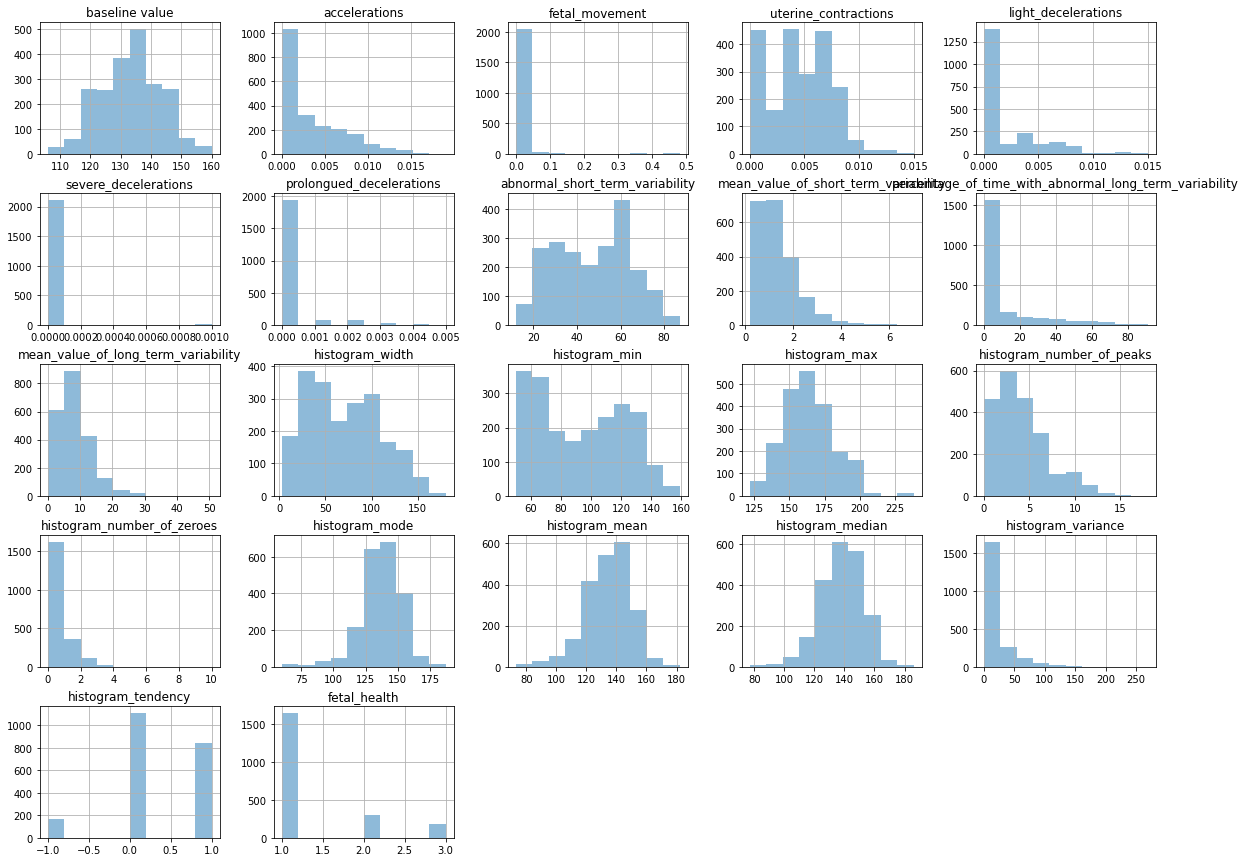

In [5]:
df.hist(figsize=(20,15), alpha=0.5)
plt.show()

L'atribut objectiu està massa desproporcionat, així que faig resampling

## Resampling

In [6]:
st = time.time()
et = time.time()

# separo les clases
df_1 = df[df["fetal_health"] == 1]
df_2 = df[df["fetal_health"] == 2]
df_3 = df[df["fetal_health"] == 3]
 
# Miro quantes dades hi ha en cada una de les classes
r1, c1 = df_1.shape
r2, c2 = df_2.shape
r3, c3 = df_3.shape

# Multiplico per 3 els samples de les dues clases minoritaries (2 i 3)
df_2_new = resample(df_2, replace=True, n_samples=r2*3, random_state=100) 
df_3_new = resample(df_3, replace=True, n_samples=r3*3, random_state=100) 

# Combino les 3 classes
df2 = pd.concat([df_1, df_2_new, df_3_new])

<AxesSubplot:title={'center':'fetal_health sense resampling'}>

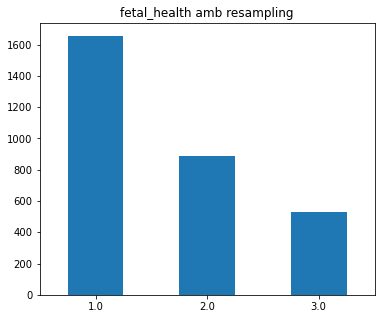

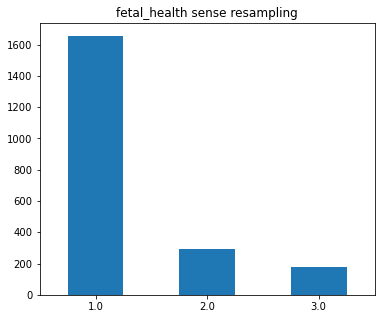

In [7]:
# Mostro el gràfic de fetal_health despres de fer resampling i del fetal_health inicial

plt.figure(figsize=(6,5))
plt.title('fetal_health amb resampling')
df2['fetal_health'].value_counts().plot.bar(rot=0)

plt.figure(figsize=(6,5))
plt.title('fetal_health sense resampling')
df['fetal_health'].value_counts().plot.bar(rot=0)

Podria fer més resampling multiplicant per 4 o 5; però per no variar massa les dades prefereixo deixar-ho així, que ja és acceptable.

## Correlació:
Per últim faig una matriu de correlació per veure la correlació entre els atributs. La faig a partir del dataframe resampled

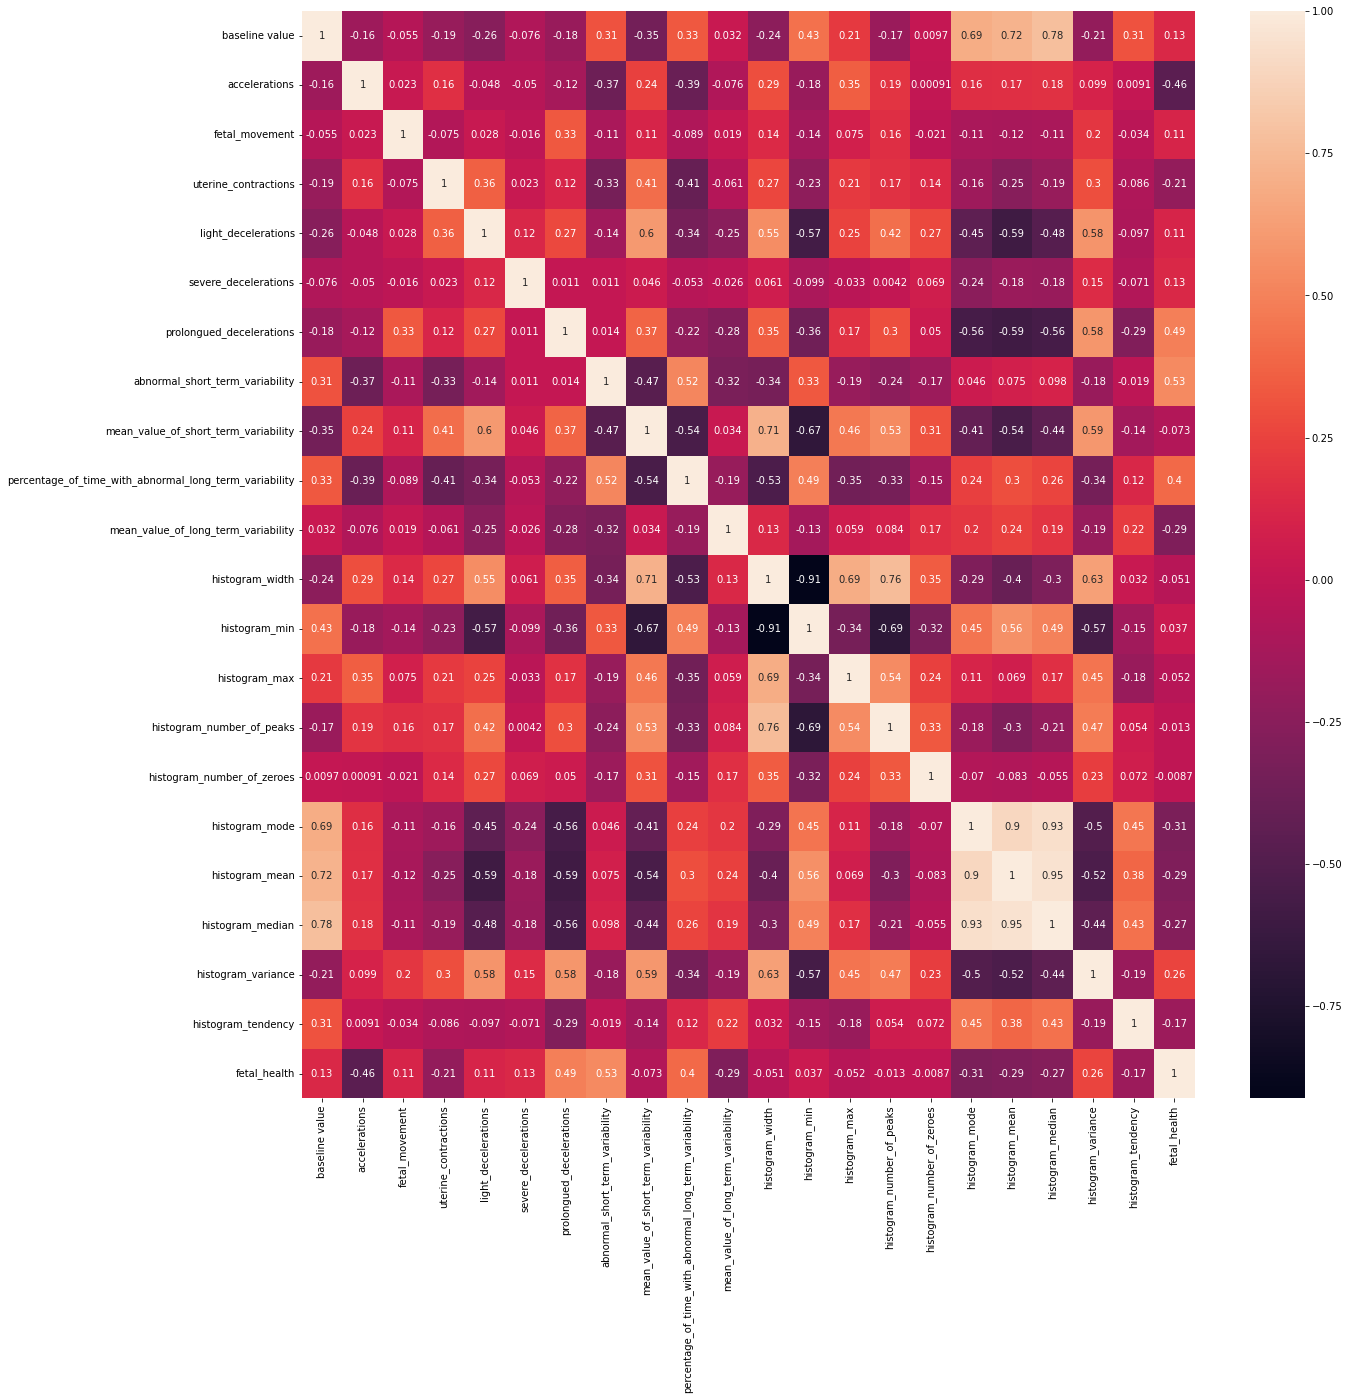

In [8]:
correlacio = df2.corr()
plt.figure(figsize = (20, 20))
ax = sns.heatmap(correlacio, annot=True)

Observem les variables amb més correlació amb el nostre atribut objectiu (fetal_health):

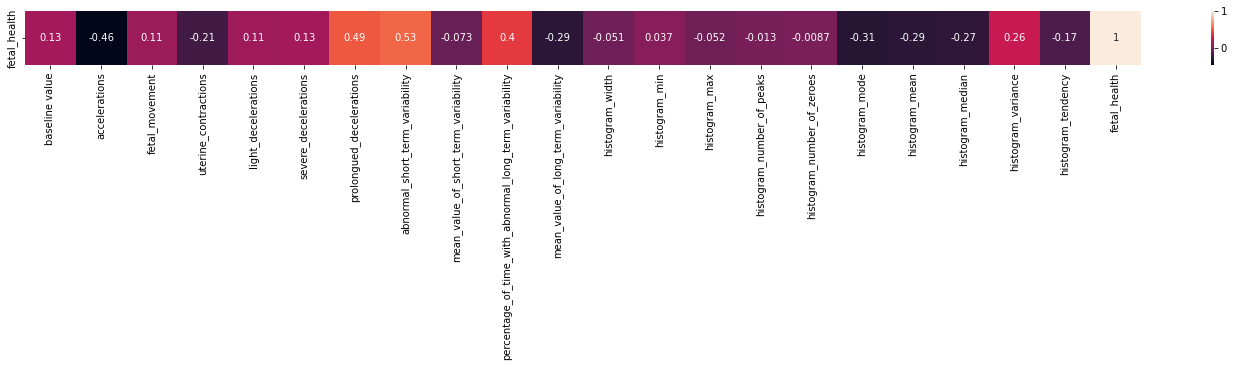

In [9]:
plt.subplots(figsize=(25,1))
sns.heatmap(correlacio.sort_values(by=["fetal_health"],ascending=False).head(1),annot=True)
plt.show()

Veiem que els atributs amb més correlació són: abnormal_short_term_variability (0,53), prlongued_decelerations (0,49), percentage_of_time_with_abnormal_long_term_variability (0,40) i histogram_variance (0,26).

Es veu relació amb les gràfiques mostrades en l'apartat de visualització dels atributs.

## PCA 

In [10]:
st = time.time()

X = df2.drop("fetal_health",axis=1)

y = df2["fetal_health"]

pca = PCA(n_components = 0.95)

pca.fit(X)

pca_data = pca.transform(X)

explained_variance = pca.explained_variance_ratio_

et = time.time()
print("temps d'execució:", et-st)

temps d'execució: 0.005984783172607422


## DecisionTreeClassifier

In [11]:
st = time.time()

list_test_sizes = [0.70, 0.50, 0.30]

for test_size in list_test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    dtclf = tree.DecisionTreeClassifier()
    dtclf.fit(X_train, y_train)
    print ('Test size of ', test_size*100, '%: ', accuracy_score(dtclf.predict(X_test),y_test))
    
et = time.time()
print("temps d'execució:", et-st)

Test size of  70.0 %:  0.9278398510242085
Test size of  50.0 %:  0.9452411994784876
Test size of  30.0 %:  0.9511400651465798
temps d'execució: 0.028922557830810547


Com els resultats són força bons faig el RandomForestClassifier

## RandomForestClassifier

In [12]:
st = time.time()

list_test_sizes = [0.70, 0.50, 0.20]

for test_size in list_test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    rfclf = RandomForestClassifier()
    rfclf.fit(X_train, y_train)
    print ('validation size of ', test_size*100, '%: ', accuracy_score(rfclf.predict(X_test),y_test))
    
et = time.time()
print("temps d'execució:", et-st)

validation size of  70.0 %:  0.9567039106145251
validation size of  50.0 %:  0.9713168187744459
validation size of  20.0 %:  0.9690553745928339
temps d'execució: 0.5944113731384277


Obtenim resultats lleugerament superiors

## KNeighborsClassifier

In [13]:
st = time.time()

list_test_sizes = [0.70, 0.50, 0.30]

for test_size in list_test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    knclf = KNeighborsClassifier()
    knclf.fit(X_train, y_train)
    print ('Test size of ', test_size*100, '%: ', accuracy_score(knclf.predict(X_test),y_test))
    
et = time.time()
print("temps d'execució:", et-st)

Test size of  70.0 %:  0.8682495344506518
Test size of  50.0 %:  0.8800521512385919
Test size of  30.0 %:  0.8914223669923995
temps d'execució: 0.20450353622436523


Resultats inferiors que els anteriors

## SVM

Faig amb els 3 kernels diferents (lineal, rbf i polinomial).

- El lineal separa les classes mitjançant línies rectes.

- El rbf separa les classes de forma "circular".

- El polinomial separa les classes de forma curvilínia.

In [14]:
st = time.time()

# Kernel lineal

list_test_sizes = [0.70, 0.50, 0.30]

for test_size in list_test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    parameters_svc = {'gamma': 'auto', 'kernel': 'linear'}
    
    svc1clf = svm.SVC(**parameters_svc)
    svc1clf.fit(X_train, y_train)
    print ('Test size of ', test_size*100, '%: ', accuracy_score(svc1clf.predict(X_test),y_test))
    
et = time.time()
print("temps d'execució:", et-st)

Test size of  70.0 %:  0.8333333333333334
Test size of  50.0 %:  0.8428943937418514
Test size of  30.0 %:  0.8436482084690554
temps d'execució: 7.469633340835571


In [15]:
st = time.time()

# Kernel rbf

list_test_sizes = [0.70, 0.50, 0.30]

for test_size in list_test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    parameters_svc = {'gamma': 'auto', 'kernel': 'rbf'}
    
    svc2clf = svm.SVC(**parameters_svc)
    svc2clf.fit(X_train, y_train)
    print ('Test size of ', test_size*100, '%: ', accuracy_score(svc2clf.predict(X_test),y_test))
    
et = time.time()
print("temps d'execució:", et-st)

Test size of  70.0 %:  0.8538175046554934
Test size of  50.0 %:  0.9106910039113429
Test size of  30.0 %:  0.9413680781758957
temps d'execució: 1.0173063278198242


In [16]:
st = time.time()

# Kernel polinomial

list_test_sizes = [0.70, 0.50, 0.30]

for test_size in list_test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    parameters_svc = {'gamma': 'auto', 'kernel': 'poly'}
    
    svc3clf = svm.SVC(**parameters_svc)
    svc3clf.fit(X_train, y_train)
    print ('Test size of ', test_size*100, '%: ', accuracy_score(svc3clf.predict(X_test),y_test))
    
et = time.time()
print("temps d'execució:", et-st)

Test size of  70.0 %:  0.8845437616387337
Test size of  50.0 %:  0.9009126466753585
Test size of  30.0 %:  0.9011943539630836
temps d'execució: 1971.8791153430939


## Model final i Crosvalidation:
Per fer el crosvalidation he triat el RandomForestClasifier, ja que és el model que té millors resultats.

Faig un crosvalidation amb els resultats del PCA i sense el PCA per veure si millora.

In [17]:
def logCrosvalLoopPCA():
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

    rfclf = RandomForestClassifier()
    rfclf.fit(X_train, y_train)

    scores = cross_val_score(rfclf, X_train, y_train, cv=10)

    scores = pd.Series(scores)
    return scores.mean();

In [18]:
def logCrosvalLoop():
    
    X = df2.drop("fetal_health",axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

    rfclf = RandomForestClassifier()
    rfclf.fit(X_train, y_train)

    scores = cross_val_score(rfclf, X_train, y_train, cv=10)

    scores = pd.Series(scores)
    return scores.mean();

In [19]:
st = time.time()

# Resultats sense PCA

totalMean = 0
iterations = 1000

for i in range(iterations):
    totalMean += logCrosvalLoop()
    
totalMean = totalMean/iterations
    
print('Cross-Validation Accuracy Scores with', iterations, 'iterations:') 
print('   mean: ', str(round((totalMean*100), 2)))

et = time.time()
print("temps d'execució:", et-st)

Cross-Validation Accuracy Scores with 1000 iterations:
   mean:  97.07
temps d'execució: 2185.790929555893


In [20]:
st = time.time()

# Resultats amb PCA

totalMean = 0
for i in range(iterations):
    totalMean += logCrosvalLoopPCA()
    
totalMean = totalMean/iterations
    
print('Cross-Validation Accuracy Scores (PCA) with', iterations, 'iterations:') 
print('   mean: ', str(round((totalMean*100), 2)))

et = time.time()
print("temps d'execució:", et-st)

Cross-Validation Accuracy Scores (PCA) with 1000 iterations:
   mean:  97.08
temps d'execució: 2261.916985273361
